In [144]:
# Initialize Otter
import otter
grader = otter.Notebook("sdse_hw4_raj.ipynb")

---

<h1><center>SDSE Homework 4<br><br> Simple linear regression </center></h1>

---

In [145]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pickle
from resources.hashutils import *

# 0. Load the data

In this homework we will implement simple linear regression and apply it to four different datasets. 

All of the formulas can be found in the lecture and reader. 

The four datasets are contained in `resources/hw4data.pickle`. Each dataset is a tuple with entries `x` and `y`:  `DA = (x,y)`.

In [146]:
with open('resources/hw4data.pickle','rb') as f:
    DA, DB, DC, DD = pickle.load(f)

In [147]:
# Use type() and .shape to explore the contents of DA through DD
D = [DA, DB, DC, DD]

for set in D:
    print(type(set))
    print(set[0].shape)
    print(set[1].shape)

<class 'tuple'>
(100,)
(100,)
<class 'tuple'>
(100,)
(100,)
<class 'tuple'>
(100,)
(100,)
<class 'tuple'>
(100,)
(100,)


# 1. Scatter plots

Display each of the four datasets using matplotlib [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) plots. Your plot should look similar to the one below, with two rows and two columns of plots.  

<img src="resources/f1.png" />

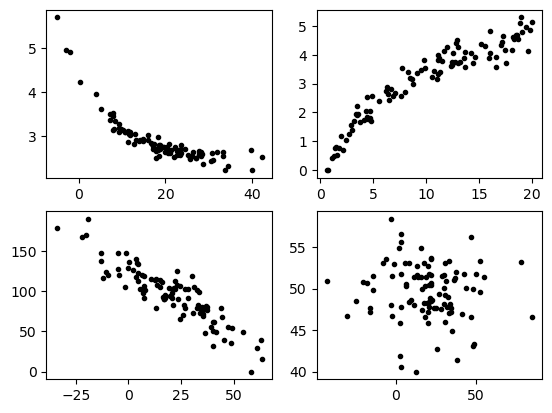

In [148]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0, 0].scatter(D[0][0], D[0][1], color='k',marker='.')
ax[0, 1].scatter(D[1][0], D[1][1], color='k',marker='.')
ax[1, 0].scatter(D[2][0], D[2][1], color='k',marker='.')
ax[1, 1].scatter(D[3][0], D[3][1], color='k',marker='.')

# 2. Sample correlation coefficient

Implement the function `corr(D)` that takes a dataset tuple `D` and returns its sample correlation coefficient $r$. 

In [149]:
def corr(D):
    N = len(D[0])
    IO_covar = (1/(N - 1)) * sum((D[0] - np.mean(D[0])) * (D[1] - np.mean(D[1])))
    std_x = np.sqrt((1/(N - 1)) * sum((D[0] - np.mean(D[0]))**2))
    std_y = np.sqrt((1/(N - 1)) * sum((D[1] - np.mean(D[1]))**2))
    return (IO_covar / (std_x * std_y))

In [150]:
rA = corr(DA)
rB = corr(DB)
rC = corr(DC)
rD = corr(DD)

print(f'rA = {rA}')
print(f'rB = {rB}')
print(f'rC = {rC}')
print(f'rD = {rD}')

rA = -0.8099147715792733
rB = 0.9385834707944011
rC = -0.9010915016350489
rD = -0.0831174891795082


In [151]:
grader.check("q2")

q2 results: All test cases passed!

# 3. Compute linear regresssion coefficients

Implement the function `compute_linear_regression(D)` that takes a dataset tuple `D` and returns the coefficients of the linear regression $\hat{\theta}_0$ and $\hat{\theta}_1$. 

In [152]:
def compute_linear_regression(D):
    N = len(D[0])
    thetahat1 = (1/(N - 1)) * sum((D[0] - np.mean(D[0])) * (D[1] - np.mean(D[1]))) / ((1/(N - 1)) * sum((D[0] - np.mean(D[0]))**2))
    thetahat0 = np.mean(D[1]) - (np.mean(D[0] * thetahat1))
    return thetahat0, thetahat1

In [153]:
thetahatA = compute_linear_regression(DA)
thetahatB = compute_linear_regression(DB)
thetahatC = compute_linear_regression(DC)
thetahatD = compute_linear_regression(DD)

print(f'A: thetahat0 = {thetahatA[0]:.2e}, thetahat1 = {thetahatA[1]:.2e}')
print(f'B: thetahat0 = {thetahatB[0]:.2e}, thetahat1 = {thetahatB[1]:.2e}')
print(f'C: thetahat0 = {thetahatC[0]:.2e}, thetahat1 = {thetahatC[1]:.2e}')
print(f'D: thetahat0 = {thetahatD[0]:.2e}, Vhetahat1 = {thetahatD[1]:.2e}')

A: thetahat0 = 3.75e+00, thetahat1 = -4.62e-02
B: thetahat0 = 9.68e-01, thetahat1 = 2.12e-01
C: thetahat0 = 1.27e+02, thetahat1 = -1.54e+00
D: thetahat0 = 4.99e+01, Vhetahat1 = -1.33e-02


In [154]:
grader.check("q3")

q3 results: All test cases passed!

# 4. Evaluate linear regresssion prediction

Implement the function `predict(thetahat,D)` that takes parameter tuple $\hat\theta=(\hat\theta_0,\hat\theta_1)$ and the dataset `D` and returns the array of predictions $\hat{y}$ for `D`: 
$$\hat{y} = \hat\theta_0 + x \hat\theta_1$$

In [155]:
def predict(thetahat,D):
    yhat = thetahat[0] + (D[0] * thetahat[1])
    return yhat

In [156]:
yhatA = predict(thetahatA,DA)
yhatB = predict(thetahatB,DB)
yhatC = predict(thetahatC,DC)
yhatD = predict(thetahatD,DD)

print(f'yhatA[:3]={yhatA[:3]}')
print(f'yhatB[:3]={yhatB[:3]}')
print(f'yhatC[:3]={yhatC[:3]}')
print(f'yhatD[:3]={yhatD[:3]}')

yhatA[:3]=[3.98923839 3.88794276 3.8414446 ]
yhatB[:3]=[1.10744508 1.12686964 1.21471094]
yhatC[:3]=[179.72584278 161.4648015  158.50090078]
yhatD[:3]=[50.46531219 50.30429035 50.22921767]


In [157]:
grader.check("q4")

q4 results: All test cases passed!

# 5. Plot linear regresssion prediction

Overlay the linear regression lines on each of the scatter plots from plot 1. Your plot should look like this:

<img src="resources/f2.png" />

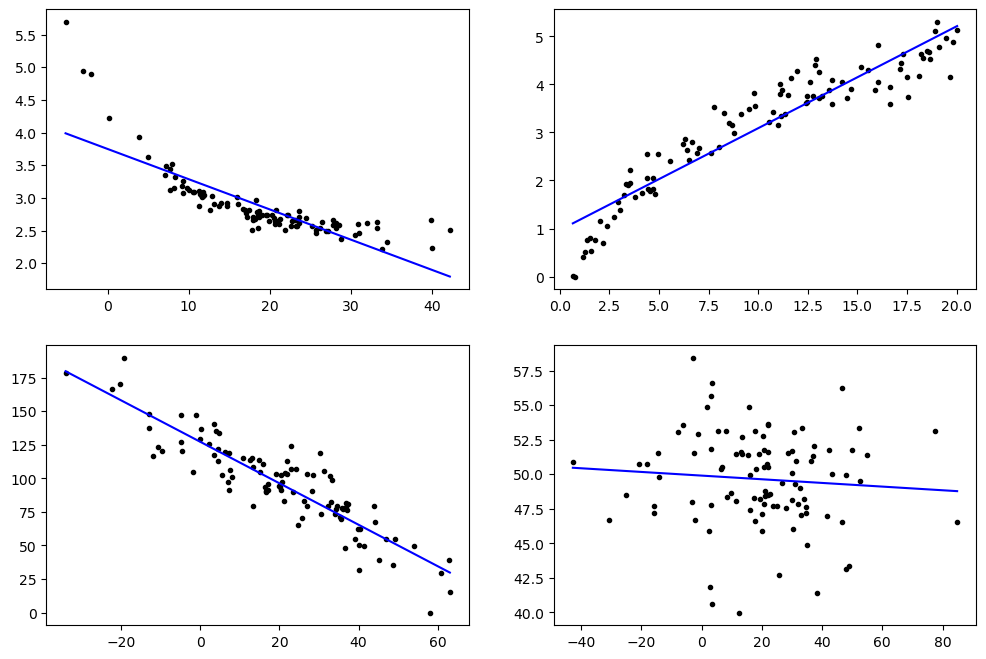

In [158]:
fig, ax = plt.subplots(figsize=(12,8),nrows=2,ncols=2)
ax[0, 0].scatter(D[0][0], D[0][1], color='k',marker='.'); ax[0, 0].plot(D[0][0], yhatA, color='blue')
ax[0, 1].scatter(D[1][0], D[1][1], color='k',marker='.'); ax[0, 1].plot(D[1][0], yhatB, color='blue')
ax[1, 0].scatter(D[2][0], D[2][1], color='k',marker='.'); ax[1, 0].plot(D[2][0], yhatC, color='blue')
ax[1, 1].scatter(D[3][0], D[3][1], color='k',marker='.'); ax[1, 1].plot(D[3][0], yhatD, color='blue')

# 6. Coefficient of determinination

Implement the function `eval_Rsquared(thetahat,D)` that takes parameters $\hat\theta=(\hat\theta_0,\hat\theta_1)$ and a dataset `D` and returns the coefficient of determination $R^2$ (formula in the lecture on supervised learning). Verify the identity $R^2=r^2$

In [159]:
def eval_Rsquared(thetahat,D):
    yhat = predict(thetahat, D)
    return 1 - (sum((D[1] - yhat)**2) / sum((D[1] - np.mean(D[1]))**2))

In [160]:
RsquaredA = eval_Rsquared(thetahatA,DA)
RsquaredB = eval_Rsquared(thetahatB,DB)
RsquaredC = eval_Rsquared(thetahatC,DC)
RsquaredD = eval_Rsquared(thetahatD,DD)

print( np.isclose( RsquaredA , corr(DA)**2 ))
print( np.isclose( RsquaredB , corr(DB)**2 ))
print( np.isclose( RsquaredC , corr(DC)**2 ))
print( np.isclose( RsquaredD , corr(DD)**2 ))

True
True
True
True


In [161]:
grader.check("q6")

q6 results: All test cases passed!

# 7. Estimate the variance of the output measurement noise ($\sigma^2$)

Implement the function `estimate_sigma2(D)` that takes a dataset `D` and returns the estimated variance of the output measurement noise $\varepsilon_i$. 

$$\hat\sigma^2  = \frac{1}{N-2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$$

where $\hat{y}_i$ are the predictions of linear regression for `D`.

In [162]:
def estimate_sigma2(D):
    N = len(D[0])
    yhat = predict(compute_linear_regression(D), D)
    return ((1/(N-2))*sum((D[1] - yhat)**2))

In [163]:
sigma2hatA = estimate_sigma2(DA)
sigma2hatB = estimate_sigma2(DB)
sigma2hatC = estimate_sigma2(DC)
sigma2hatD = estimate_sigma2(DD)

print(f'sigma2A = {sigma2hatA:.2e}')
print(f'sigma2B = {sigma2hatB:.2e}')
print(f'sigma2C = {sigma2hatC:.2e}')
print(f'sigma2D = {sigma2hatD:.2e}')

sigma2A = 9.63e-02
sigma2B = 2.08e-01
sigma2C = 2.19e+02
sigma2D = 1.16e+01


In [164]:
grader.check("q7")

q7 results: All test cases passed!

# 8. Uncertainty in the linear regression coefficients

Implement the function `compute_var_param(D)` that takes a dataset `D` and returns the variance associated with the linear regression parameters.

$$Var[\hat\Theta_1] = \frac{\hat\sigma^2}{(N-1)\hat{\sigma}_X^2}$$

$$Var[\hat\Theta_0] = \frac{\hat\sigma^2}{N} + \frac{\hat\sigma^2 \hat{\mu}^2_X  }{(N-1)\hat{\sigma}_X^2}$$

In [165]:
def compute_var_param(D):
    N = len(D[0])
    sigma2hat = estimate_sigma2(D)
    var_x = (1 / (N - 1)) * sum((D[0] - np.mean(D[0]))**2)
    var1 = sigma2hat / ((N - 1) * var_x)
    var0 = (sigma2hat / N) + ((sigma2hat * (np.mean(D[0])**2)) / (var_x * (N - 1)))
    return var0, var1

In [166]:
varA = compute_var_param(DA)
varB = compute_var_param(DB)
varC = compute_var_param(DC)
varD = compute_var_param(DD)

print(f'A: Var[thetahat0] = {varA[0]:.2e}, Var[thetahat1] = {varA[1]:.2e}')
print(f'B: Var[thetahat0] = {varB[0]:.2e}, Var[thetahat1] = {varB[1]:.2e}')
print(f'C: Var[thetahat0] = {varC[0]:.2e}, Var[thetahat1] = {varC[1]:.2e}')
print(f'D: Var[thetahat0] = {varD[0]:.2e}, Var[thetahat1] = {varD[1]:.2e}')

A: Var[thetahat0] = 4.94e-03, Var[thetahat1] = 1.14e-05
B: Var[thetahat0] = 8.48e-03, Var[thetahat1] = 6.20e-05
C: Var[thetahat0] = 4.57e+00, Var[thetahat1] = 5.64e-03
D: Var[thetahat0] = 2.13e-01, Var[thetahat1] = 2.58e-04


In [167]:
grader.check("q8")

q8 results: All test cases passed!

# 9. Confidence intervals

Implement the function `compute_rho(D,gamma)` that takes a dataset `D` and confidence level $\gamma$, and returns the radiuses $\rho_0$ and $\rho_1$ of the $\gamma$-confidence intervals for $\hat\theta_0$ and $\hat\theta_1$ respectively.

Note:
+ See ``Linear Regression part 1'' for the formulas.
+ Because $N$ is ``large'' ($N>40$) we can use the inverse cdf of the unit normal distribution. 

In [168]:
def compute_rho(D,gamma):
    N = len(D[0])
    varParams = compute_var_param(D)
    rho0 = np.sqrt(varParams[0]) * np.abs(stats.norm.ppf((1 - gamma) / 2))
    rho1 = np.sqrt(varParams[1]) * np.abs(stats.norm.ppf((1 - gamma) / 2))
    return rho0, rho1

In [169]:
gamma = 0.98
rhoA = compute_rho(DA,gamma)
rhoB = compute_rho(DB,gamma)
rhoC = compute_rho(DC,gamma)
rhoD = compute_rho(DD,gamma)

print(f'A: rho0 = {rhoA[0]:.2e}, rho1 = {rhoA[1]:.2e}')
print(f'B: rho0 = {rhoB[0]:.2e}, rho1 = {rhoB[1]:.2e}')
print(f'C: rho0 = {rhoC[0]:.2e}, rho1 = {rhoC[1]:.2e}')
print(f'D: rho0 = {rhoD[0]:.2e}, rho1 = {rhoD[1]:.2e}')

A: rho0 = 1.64e-01, rho1 = 7.87e-03
B: rho0 = 2.14e-01, rho1 = 1.83e-02
C: rho0 = 4.97e+00, rho1 = 1.75e-01
D: rho0 = 1.07e+00, rho1 = 3.74e-02


In [170]:
grader.check("q9")

q9 results: All test cases passed!

# 10. Negligible parameters

We consider a slope parameter to be "negligible" when it is close to zero. We define "close" to mean that zero is within its 95\% confidence interval. Which of the 4 cases have a negligible slope parameter $\hat\theta_1$? Provide your answer as a comma-separated string, e.g. `"A,B"`.

In [171]:
def is_negligible(D,gamma):
    thetahat = compute_linear_regression(D)
    rho = compute_rho(D, gamma)
    captures_zero = True if thetahat[1] - rho[1] < 0 and thetahat[1] + rho[1] > 0 else False
    return captures_zero

gamma = 0.95
print(is_negligible(DA,gamma))
print(is_negligible(DB,gamma))
print(is_negligible(DC,gamma))
print(is_negligible(DD,gamma))
answer = "D"

False
False
False
True


In [172]:
grader.check("q10")

q10 results: All test cases passed!

# 11. Nonlinear feature vector

The dataset `DA` looks like it could be modeled as exponential decay. Let's use this insight to improve the regression model for this dataset. Define a feture vector `phi` with
$$\phi(x) = e^{\lambda x}$$
Using trial-and-error, find a value for $\lambda$ that achieves an $R^2$ of 0.9 or more. 

**Note**: The test for this question is hidden and will only be evaluated in Gradescope.

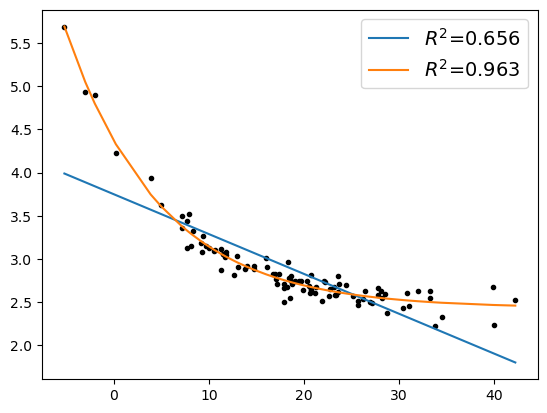

In [173]:
lbda = -0.1
x, y = DA
phi = np.exp(lbda*x)
DA2 = (phi,y)
thetahatA2 = compute_linear_regression(DA2)    # TODO
RsquaredA2 = eval_Rsquared(thetahatA2,DA2)     # TODO

fig, ax = plt.subplots()
ax.scatter(DA[0],DA[1],color='k',marker='.')
ax.plot(DA[0],predict(thetahatA,DA),label='$R^2$={:.3f}'.format(RsquaredA))
ax.plot(DA[0],predict(thetahatA2,DA2),'-',label='$R^2$={:.3f}'.format(RsquaredA2))
ax.legend(fontsize=14)

# 12. Prediction uncertainty

Implement the function `compute_var_prediction(D,x)` that takes a dataset `D` and an array of test input samples `xtest`, and returns the array of variances in the predictions $\hat{y}$ corresponding to elements in `xtest`.

$$Var[\hat{y}] = \frac{\hat\sigma^2}{N} + \frac{\hat\sigma^2(x-\hat\mu_X)^2}{(N-1)\hat{\sigma}^2_X}  $$

In [174]:
def compute_var_prediction(D,xtest):
    N = len(xtest)
    sigma2hat = estimate_sigma2(D)
    var_x = (1 / (N - 1)) * sum((xtest - np.mean(xtest))**2)

    return ((sigma2hat / N) + ((sigma2hat * (xtest - np.mean(xtest))**2) / ((N - 1) * var_x)))

In [175]:
# Evaluate the prediction variance on the training input samples. 

varYhatA = compute_var_prediction(DA,DA[0])
stddevYhatA = np.sqrt(varYhatA)

varYhatB = compute_var_prediction(DB,DB[0])
stddevYhatB = np.sqrt(varYhatB)

varYhatC = compute_var_prediction(DC,DC[0])
stddevYhatC = np.sqrt(varYhatC)

varYhatD = compute_var_prediction(DD,DD[0])
stddevYhatD = np.sqrt(varYhatD)

print(f'stddevYA={stddevYhatA[:20:3]}')
print(f'stddevYB={stddevYhatB[:20:3]}')
print(f'stddevYC={stddevYhatC[:20:3]}')
print(f'stddevYD={stddevYhatD[:20:3]}')

stddevYA=[0.08643448 0.06966488 0.0498225  0.04820286 0.04679432 0.04424612
 0.0414014 ]
stddevYB=[0.08762327 0.08352081 0.08168098 0.07779715 0.07289334 0.07035215
 0.06925625]
stddevYC=[4.35776707 3.33866243 2.85387726 2.42265468 2.23691524 2.12253484
 1.95435833]
stddevYD=[1.05420215 0.72793851 0.65995923 0.55575209 0.49422517 0.47528383
 0.43187652]


In [176]:
grader.check("q12")

q12 results: All test cases passed!

# 13. Plot the prediction with uncertainty bounds

Repeat the scatter and prediction plot, but this time overlay an prediction uncertainty band of plus/minus two standard deviations. Your plot should look something like this:

<img src="resources/f3.png" />


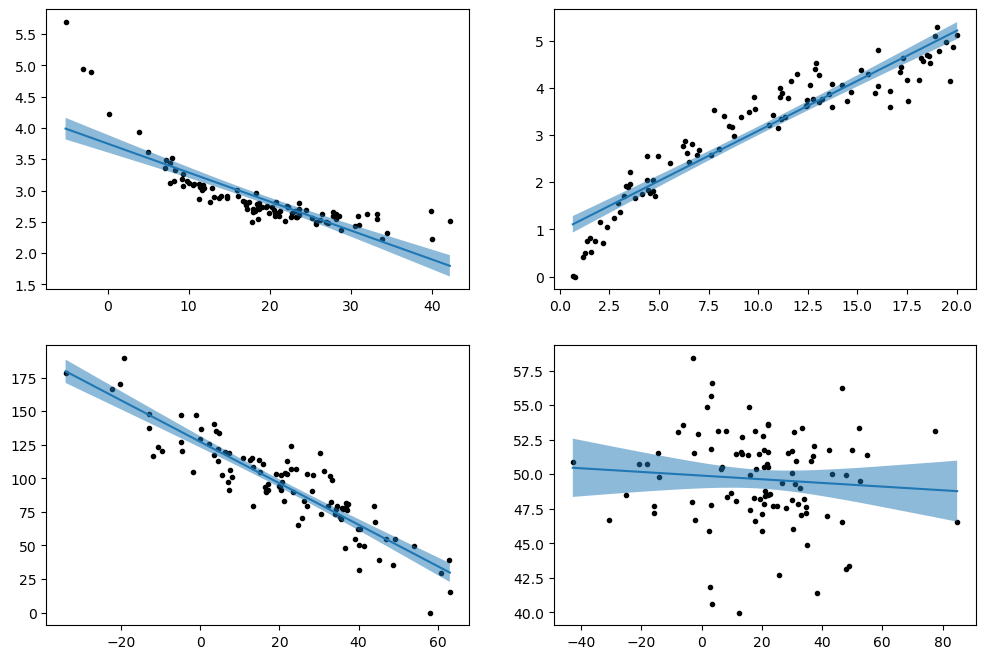

In [177]:
fig, ax = plt.subplots(figsize=(12,8),nrows=2,ncols=2)

a = ax[0,0]
D = DA
x, y = D
thetahat = compute_linear_regression(D)
yhat = predict(thetahat,D)
stdevY = np.sqrt(compute_var_prediction(D,x))
a.scatter(x,y,color='k',marker='.')
a.plot(x,yhat)
a.fill_between(x,yhat-2*stdevY,yhat+2*stdevY,alpha=0.5)

a = ax[0,1]
D = DB
x, y = D
thetahat = compute_linear_regression(D)
yhat = predict(thetahat,D)
stdevY = np.sqrt(compute_var_prediction(D,x))
a.scatter(x,y,color='k',marker='.')
a.plot(x,yhat)
a.fill_between(x,yhat-2*stdevY,yhat+2*stdevY,alpha=0.5)

a = ax[1,0]
D = DC
x, y = D
thetahat = compute_linear_regression(D)
yhat = predict(thetahat,D)
stdevY = np.sqrt(compute_var_prediction(D,x))
a.scatter(x,y,color='k',marker='.')
a.plot(x,yhat)
a.fill_between(x,yhat-2*stdevY,yhat+2*stdevY,alpha=0.5)

a = ax[1,1]
D = DD
x, y = D
thetahat = compute_linear_regression(D)
yhat = predict(thetahat,D)
stdevY = np.sqrt(compute_var_prediction(D,x))
a.scatter(x,y,color='k',marker='.')
a.plot(x,yhat)
a.fill_between(x,yhat-2*stdevY,yhat+2*stdevY,alpha=0.5)

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [178]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)